In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [1]:
import tensorflow as tf
from aml_dl.mdn.model.nn_push_fwd_model import NNPushForwardModel

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import math
from aml_dl.mdn.training.config import network_params_fwd

In [3]:
sess = tf.Session()

network_params_fwd['load_saved_model'] = False
forward_model = NNPushForwardModel(sess=sess, network_params=network_params_fwd)
forward_model.init_model()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


## Load data

In [4]:
from aml_io.data_manager import DataManager

In [5]:
data_manager = DataManager.from_file(network_params_fwd['training_data_path'], network_params_fwd['train_data_file_names'])

In [6]:
# print data_manager.get_sample(0,'state_before')

In [7]:
ids=['all']

x_keys = ['task_before', 'task_action']

y_keys = ['task_after']

x_sub_keys = [['pos', 'ori'],['push_xz']]

y_sub_keys = [['pos', 'ori']]

data_x, data_y = data_manager.pack_sample(x_keys=x_keys, x_sub_keys=x_sub_keys, 
                                          y_keys=y_keys, y_sub_keys=y_sub_keys, 
                                          ids = ids)

In [8]:
# print data_y

In [9]:
h = forward_model.run_op('z_hidden',data_x)

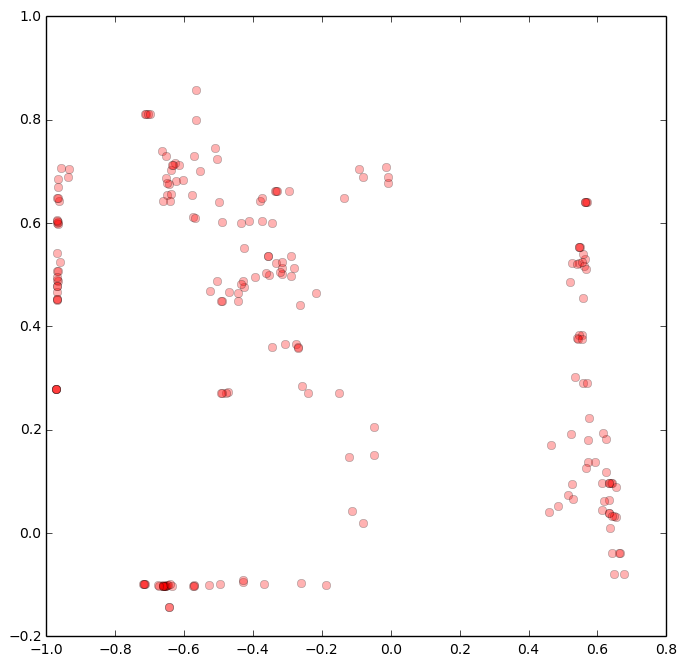

In [10]:
plt.figure(figsize=(8, 8))
plt.plot(h, data_y,'ro', alpha=0.3)
plt.show()

In [11]:
epochs = 10000#10000

loss = forward_model.train(data_x,data_y, epochs = epochs)


In [12]:
# ######## SAVING MODEL #######
# save_path = saver.save(sess, "push_model.ckpt")
# print("Model saved in file: %s" % save_path)

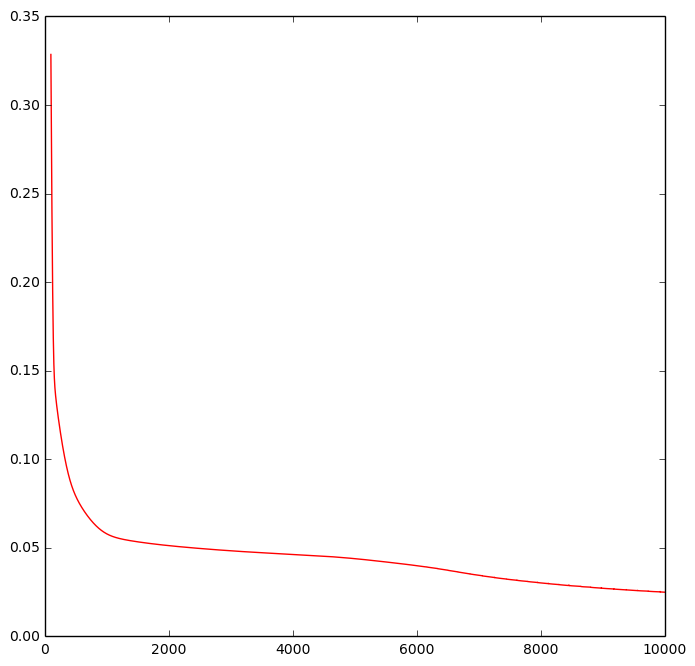

In [13]:
plt.figure(figsize=(8, 8))
plt.plot(np.arange(100, epochs,1), loss[100:], 'r-')
plt.show()